# Assignment 4
## Roll Number `31311`

1. Use the inbuilt dataset 'titanic'. The dataset contains 891 rows and contains information about the passengers who boarded the unfortunate Titanic ship. 
    Use the Seaborn library to see if we can find any patterns in the data.
2. Write a code to check how the price of the ticket (column name: 'fare') for each passenger is distributed by plotting a histogram.
    The objective is to predict the value of prices of the house using the given features

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os 

In [95]:
os.listdir()

['Assignment4.ipynb', 'Titanic-Dataset.csv']

In [96]:
df = pd.read_csv("./Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df.shape

(891, 12)

In [98]:
def display_all(dataFrame : pd.DataFrame):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(dataFrame.T)

display_all(df.describe(include='all'))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [99]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## 1. Imputing missing values
### The titanic dataset has a LOT of missing values
#### I could not find the test and train splits so this dataset from the `COMPUTER DEPARTMENT PORTAL` will be used


- `Age` column has **177** missing values 
- `Cabin` column has **687** missing values

### 1.1 Impute the missing age values
- A simple option here would be to give each missing value the median age. 
- But that would be BORING! Not to mention inaccurate
- We know that the `name` column contains the titles for each person i.e., Mr., Mrs., Ms., Dr., Miss and Master
- So let's use these titles and put median values of these for a much more accurate imputation 

In [101]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\chane\AppData\Local\Temp\ipykernel_11120\2813372668.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)


In [102]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
771,772,0,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,Mr
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S,Miss
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S,Mr
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,Col
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,STON/O2. 3101283,7.9250,NaN,S,Miss


In [103]:
df['Title'].value_counts(sort=True)

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

- Here titles like `Ms`, `Mme`, `Lady` refer to the Miss or Mrs. so we'll generalise them. 
- These mappings will replace the existing ones so that we have some uniformity

In [104]:
title_maps = {
    'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
    'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
    'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'
    }
# Replacing the titles with generic ones here, sp we'll have only 6 titles to deal with
df.replace({'Title':title_maps}, inplace=True)

In [105]:
df['Title'].value_counts(sort=True)

Title
Mr        525
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: count, dtype: int64

**Median of title group**

To find the age, we will use the median of the title group

In [106]:
age_by_title = dict(df.groupby('Title')['Age'].median())
df['median_age'] = df['Title'].apply(lambda x: age_by_title[x])

df.fillna({'Age': df['median_age']}, inplace=True)

In [107]:
del df['median_age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### 1.2 Impute Missing Fare Values


In [108]:
for index, row in df.iterrows():
    if pd.notna(row['Cabin']):
        print(f"Cabin: {row['Cabin']}\t\t Fare: {row['Fare']}")

Cabin: C85		 Fare: 71.2833
Cabin: C123		 Fare: 53.1
Cabin: E46		 Fare: 51.8625
Cabin: G6		 Fare: 16.7
Cabin: C103		 Fare: 26.55
Cabin: D56		 Fare: 13.0
Cabin: A6		 Fare: 35.5
Cabin: C23 C25 C27		 Fare: 263.0
Cabin: B78		 Fare: 146.5208
Cabin: D33		 Fare: 76.7292
Cabin: B30		 Fare: 61.9792
Cabin: C52		 Fare: 35.5
Cabin: B28		 Fare: 80.0
Cabin: C83		 Fare: 83.475
Cabin: F33		 Fare: 10.5
Cabin: F G73		 Fare: 7.65
Cabin: C23 C25 C27		 Fare: 263.0
Cabin: E31		 Fare: 61.175
Cabin: A5		 Fare: 34.6542
Cabin: D10 D12		 Fare: 63.3583
Cabin: D26		 Fare: 77.2875
Cabin: C110		 Fare: 52.0
Cabin: B58 B60		 Fare: 247.5208
Cabin: E101		 Fare: 13.0
Cabin: D26		 Fare: 77.2875
Cabin: F E69		 Fare: 22.3583
Cabin: D47		 Fare: 26.2833
Cabin: C123		 Fare: 53.1
Cabin: B86		 Fare: 79.2
Cabin: F2		 Fare: 26.0
Cabin: C2		 Fare: 66.6
Cabin: E33		 Fare: 55.0
Cabin: B19		 Fare: 33.5
Cabin: A7		 Fare: 30.6958
Cabin: C49		 Fare: 28.7125
Cabin: F4		 Fare: 39.0
Cabin: A32		 Fare: 50.0
Cabin: F2		 Fare: 26.0
Cabin: B4		 

In [109]:
df['Cabin_Class'] = df['Cabin'].str[0]

median_cabin_fare = df.groupby('Cabin_Class')['Fare'].median().to_dict()

This is the median fare for the missing cabin values according the the class

In [110]:
median_cabin_fare

{'A': 35.5,
 'B': 80.0,
 'C': 83.475,
 'D': 53.1,
 'E': 45.18125,
 'F': 13.0,
 'G': 13.58125,
 'T': 35.5}

In [111]:
def assign_cabin(fare):
    closest_cabin = min(median_cabin_fare.keys(), key=lambda c : abs(median_cabin_fare[c] - fare))
    # the above line will iterate over the dict and give us the most probable value for the cabin
    return closest_cabin

In [112]:
df.loc[df['Cabin'].isna(), 'Cabin'] = df.loc[df['Cabin'].isna(), 'Fare'].apply(assign_cabin)

In [113]:
df.drop(columns=['Cabin_Class'], inplace=True)

In [114]:
df.loc[df['Embarked'].isna(), 'Embarked'] = df['Embarked'].mode()[0]

In [115]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
dtype: int64

## Data Visualisation
- Now that we have cleaned our data we can perform data visualisation on it
**Plots:**
- Title vs Age 
- Countplot of the survived according to Titles i.e., survived count vs Title
- Stripplot Male vs Female survived (swarmplot was giving an error)
- Fare vs Count Histogram

### Title vs Age

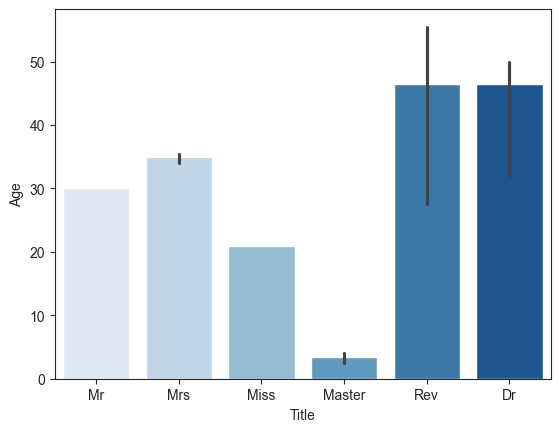

In [116]:
sns.barplot(x='Title', y='Age', data=df, estimator=np.median, hue='Title', palette='Blues')
# plt.xticks(rotation=45)
plt.show()

### Countplot of the survived titles

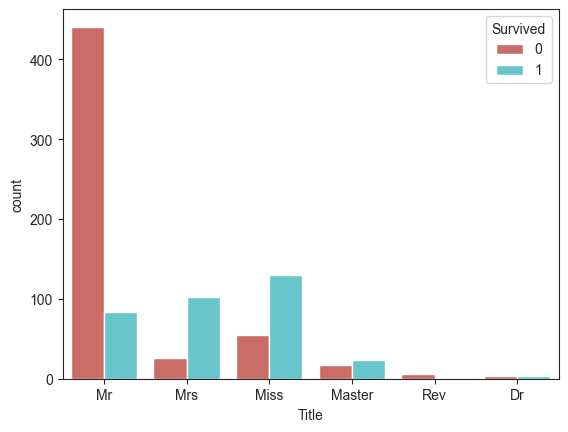

In [117]:
sns.countplot(x='Title', data=df, palette='hls', hue='Survived')
# plt.xticks(rotation=45)
plt.show()

### Stripplot of Male vs Female survived

d:\Coding-practice\Pict-Practicals\env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Coding-practice\Pict-Practicals\env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 37.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Coding-practice\Pict-Practicals\env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 72.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Coding-practice\Pict-Practicals\env\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 49.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
d:\Coding-practice\Pict-Practicals\env\Lib\site-

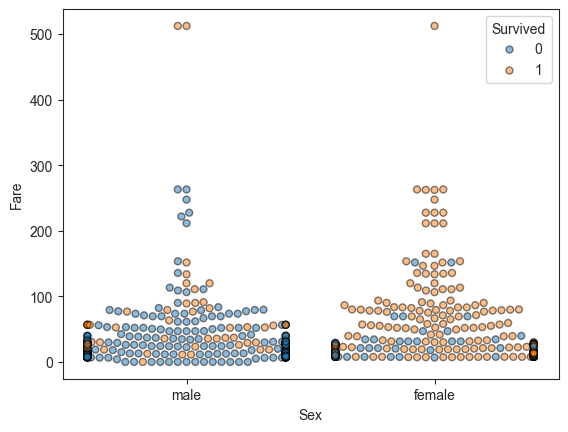

In [118]:
sns.swarmplot(x='Sex', y='Fare', hue='Survived', data=df, edgecolor="black",alpha=.5, s=5,linewidth=1.0)
plt.show()

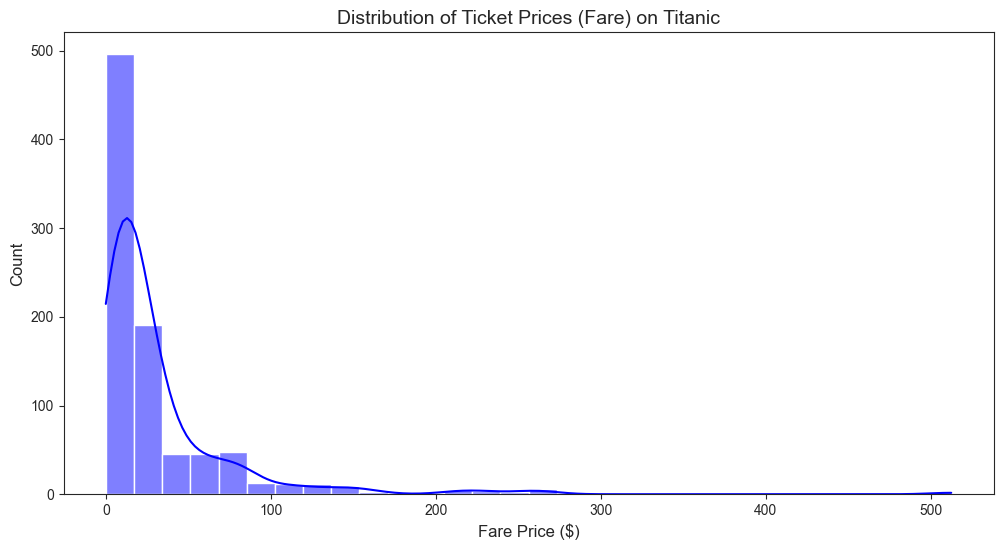

In [119]:
sns.set_style("ticks")
plt.figure(figsize=(12, 6))
sns.histplot(df["Fare"], bins=30, kde=True, color="blue")

plt.xlabel("Fare Price ($)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Ticket Prices (Fare) on Titanic", fontsize=14)

plt.show()


In [120]:
from sklearn.preprocessing import LabelEncoder

# Convert Sex, Embarked to numeric using LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])          # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])

# Drop unneeded columns
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId', 'Title'], axis=1, inplace=True)

In [121]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']
x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=42)

In [122]:
(x_train.shape, y_train.shape)

((668, 7), (668,))

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# X_tr, X_val, y_tr, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Validation Accuracy:", accuracy_score(y_test, y_pred))


Validation Accuracy: 0.8071748878923767


In [135]:
# Predict on test data
test_preds = model.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy = {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy = 0.8071748878923767
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       134
           1       0.75      0.78      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223



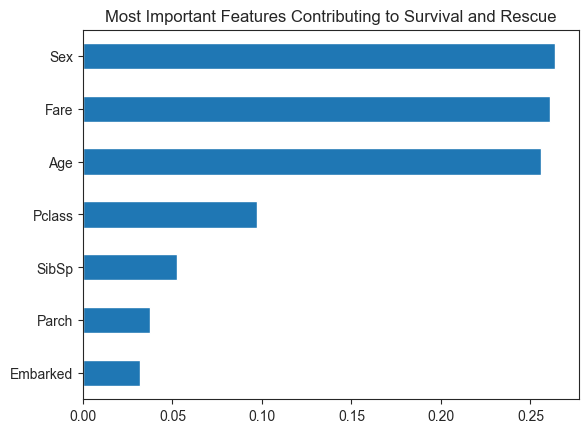

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.sort_values().plot(kind='barh')
plt.title("Most Important Features Contributing to Survival and Rescue")
plt.show()
